Now that the clean data set has been obtained, models will be trained and tested for accuracy. The first step is to import the necessary modules and packes for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv('Data/clean_data.csv')

Since the clean data contains an unnecessary column named "Unnamed: 0", it has been excluded. Moreover, Loan_ID has absolutely no impact on the loan approvals and hence it will also be excluded from analysis.

In [4]:
data = data.drop(['Unnamed: 0', 'Loan_ID'], axis=1)

In [5]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In the next step, variables in the model that are categorical features will be identified

In [6]:
df_cats = data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education', 'Property_Area']]

We now apply the get_dummies method to create dummy variables for each categorical variable. For example, for the variable "Married" will be split into two columns : "Married_Yes" and "Married_No". The "Yes" and "No" are the values assigned to the original column. The Married_Yes column will have 1s for those are married and 0s for those who aren't. The Married_No column will have 1s for those who are not married and a 0 for those who are married. Hence, we know that a person can have a 1 assigned to either "Married_Yes" or "Married_No" but not both. Hence, this is redunant information and one of the dummy variable columns needs to be excluded from analysis. This can be achieved by specifying the parameter "drop_first" set to True which drops one dummy column for each categorical variable.

In [7]:
df_cats_dummies = pd.get_dummies(df_cats, drop_first=True)

The other variables for analysis have been identified and assigned to a dataframe.

In [8]:
df_other_vars = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

The dataframs containing the categorical features (now with dummy variables) and the non categorical features have been concatenated column wise.

In [9]:
X_set = pd.concat([df_cats_dummies, df_other_vars], axis=1)

The dummy variables can be observed below.

In [10]:
X_set.head()

,Gender_Male,Gender_Other,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,0,1,5849,0.0,146.412162,360.0,1.0
1,1,0,1,1,0,0,0,0,0,0,4583,1508.0,128.000000,360.0,1.0
2,1,0,1,0,0,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0
3,1,0,1,0,0,0,0,1,0,1,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,0,0,0,0,1,6000,0.0,141.000000,360.0,1.0


In [11]:
X = X_set.values

The dependent variable, "y" will have a value of 1 assigned if the loan has been approved and a 0 for those who didn't have their loans approved.

In [12]:
y = (data.Loan_Status == 'Y')

In [13]:
y = y.values

The raw data will now be split into the into the tes and training sets

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.3)

We begin our analysis with the ensemble method "RandomForestClassifier". In this method, random sampling with replacement is performed. Then a subset of the original features are randomly used for analyzing the various bootstrap samples generated in the earlier step. These would result in a series of weak individual models. These "weak" models are then aggregated to give a strong prediction model.

In [15]:
clf = RandomForestClassifier(random_state=123)

The classifier will now be fit on the training data

In [16]:
clf.fit(Xtrain, ytrain)

C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

The model will now be used to predict the test set.

In [17]:
y_pred = clf.predict(Xtest)

Cross validation is performed to ensure independence from one single split of the data into test and training models.

In [18]:
cv_scores = cross_val_score(clf, Xtrain, ytrain, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.7019066937119675


In [19]:
cv_scores = cross_val_score(clf, Xtrain, ytrain, cv = 5, scoring = 'roc_auc')
print("Average 5-Fold CV Score using ROC scoring: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score using ROC scoring: 0.6923762084909626


In [20]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

       False       0.62      0.38      0.48        65
        True       0.72      0.88      0.79       120

   micro avg       0.70      0.70      0.70       185
   macro avg       0.67      0.63      0.63       185
weighted avg       0.69      0.70      0.68       185



In the next step, using Principal Component Analysis, the variances of the individual features will be plotted. Variables with low variances could be considered as "noise" and hence, could be excluded from analysis.

C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


([<matplotlib.axis.XTick at 0x22c4c220898>,
 <a list of 15 Text xticklabel objects>)

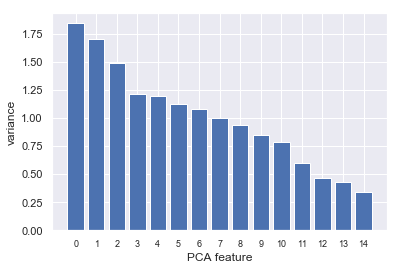

In [21]:
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_set)

# Plot the explained variances
features = range(pca.n_components_)
plt.rc('xtick', labelsize=9)
#rc('font', **font)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)

While there were originally 15 features considered for analysis, it would seem that the "intrinsic" dimensionality could be no more than 6 or 7. That is, the other variables are just "noise" hindering our analysis.

As we have used the Random Forest classifier method, the feature importance of variables will be plotted which will help better understand which variables are crucial for analysis and which aren't.

In [252]:
for name, importance in zip(X_set.columns, clf.feature_importances_):
    print(name + "=" + str(importance))

Gender_Male=0.031194862482851592
Gender_Other=0.007129916363155499
Married_Yes=0.025473792325597423
Dependents_1=0.029800356099535068
Dependents_2=0.023140588785092918
Dependents_3+=0.013362681636487938
Self_Employed_Yes=0.02496898325504291
Education_Not Graduate=0.03389432207947361
Property_Area_Semiurban=0.04089714660500711
Property_Area_Urban=0.03522358402834577
ApplicantIncome=0.2555953595243921
CoapplicantIncome=0.1193620053055007
LoanAmount=0.17975937496852112
Loan_Amount_Term=0.05901321496067001
Credit_History=0.12118381158032623


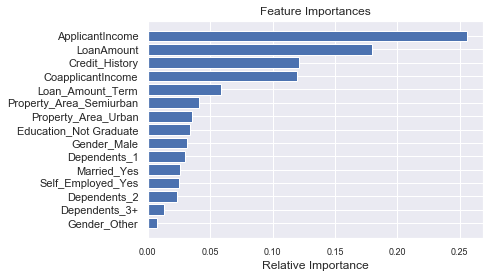

In [253]:
features = X_set.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the above plot, it can be observed that the categorical variables Gender(Gender_Male, Gender_Other), Dependents(Dependents_1, Dependents_1, Dependents_3+), Married(Married_Yes) and Self_Employed(Self_Employed_Yes) have relatively low variance. In the next step, we will exclude these vaiables from our analysis and see how the model performs.

In [22]:
X_set.columns

Index(['Gender_Male', 'Gender_Other', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Self_Employed_Yes',
       'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [68]:
X_set_new = X_set[['Property_Area_Semiurban','Property_Area_Urban','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_set_new.values, y, random_state=42, test_size=0.25)

In [70]:
clf = RandomForestClassifier(random_state=123)
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [71]:
cv_scores = cross_val_score(clf, Xtrain, ytrain, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.7132053080159673


The average accuracy score on the training set has been computed to be ~71.3%.

In [72]:
y_pred = clf.predict(Xtest)

In [73]:
accuracy_score(ytest, y_pred)

0.7207792207792207

By excluding the variables will low variances, our model performance did improve by around ~3%.

In [74]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

       False       0.63      0.48      0.55        54
        True       0.75      0.85      0.80       100

   micro avg       0.72      0.72      0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



Next, the model will be analyzed using Support Vector Machines. Before beginnign analysis, all the values for the variables must be on the same scale. This will help us better our analysis.

The variables are scaled using the "scale" method.

In [29]:
X_scaled = scale(X_set)

C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


We initialize the classifier object.

In [85]:
svm_clf = svm.SVC(kernel='rbf', gamma = 'auto')

In [82]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, random_state=42, test_size=0.25)

The SVM classifier will now be used to train the data.

In [78]:
svm_clf.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
cv_scores = cross_val_score(svm_clf, Xtrain, ytrain, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.7435730468689796


The average accuracy on the training set has been computed at ~74%.

We will now predict on the test set.

In [79]:
y_pred = svm_clf.predict(Xtest)

In [80]:
accuracy_score(ytest, y_pred)

0.7532467532467533

The test set accuracy is approximately ~75% which is close to training set accuracy. This is decent model as it has a success rate of 3 over 4.

We now perform hyper parameter tuning to see if we can achieve a higher accuracy score.

In [84]:
C_space = np.array([0.001, 0.1, 1])
gamma_sp = np.array([1, 10, 100])
param_grid = {'C': C_space, 'gamma' : gamma_sp}

In [86]:
svm_clf_tuning = GridSearchCV(svm_clf, param_grid, cv=5)

In [87]:
svm_clf_tuning.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.001, 0.1  , 1.   ]), 'gamma': array([  1,  10, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
print("Tuned SVM Parameters: {}".format(svm_clf_tuning.best_params_)) 
print("Best score is {}".format(svm_clf_tuning.best_score_))

Tuned SVM Parameters: {'C': 1.0, 'gamma': 1}
Best score is 0.7086956521739131


By training the model without excluding any of the variables, we achieved only a ~71% accuracy. Let us now perform hyper parameter tuning excluding the "noise" variables.

In [40]:
X_set_new_scale = scale(X_set_new)

C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_set_new_scale, y, random_state=42, test_size=0.25)

In [42]:
svm_clf_reduced = svm.SVC(kernel='rbf')

In [43]:
svm_clf_tuning = GridSearchCV(svm_clf_reduced, param_grid, cv=5)

In [44]:
svm_clf_tuning.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.001, 0.1  , 1.   ]), 'gamma': array([  1,  10, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print("Tuned Supper Vector Machine Parameters: {}".format(svm_clf_tuning.best_params_)) 
print("Best score is {}".format(svm_clf_tuning.best_score_))

Tuned Supper Vector Machine Parameters: {'C': 1.0, 'gamma': 1}
Best score is 0.7608695652173914


Indeed, considering only the most important variables improved the training accuracy to ~76%.

In [46]:
best_svm = svm.SVC(kernel='rbf', C = 1.0, gamma = 1.0)

In [47]:
best_svm.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
y_pred = best_svm.predict(Xtest)

In [49]:
accuracy_score(ytest, y_pred)

0.7402597402597403

We can achieve a best test_accuracy score of ~74% using SVMs.

Next, we will consider the Logistic regression approach.

In [55]:
clf_log = LogisticRegression()

Hyper parameter tuning will be performed to determing the best value of "C".

In [56]:
C_space = np.array([0.0001, 0.001, 0.1, 1])

In [57]:
param_grid = {'C': C_space}

In [58]:
clf_log_tuning = GridSearchCV(clf_log, param_grid, cv=5)

In [60]:
clf_log_tuning.fit(Xtrain, ytrain)

C:\Users\Aditya\Miniconda2\envs\ipykernel_py3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-04, 1.e-03, 1.e-01, 1.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
print("Tuned Logistic Regression Parameters: {}".format(clf_log_tuning .best_params_)) 
print("Best score is {}".format(clf_log_tuning .best_score_))

Tuned Logistic Regression Parameters: {'C': 0.0001}
Best score is 0.7695652173913043


Using Logistic Regression, we achieved a training set accuracy of ~76% which has by far been the best (in terms of training set accuracy alone.)

Next, the model will be fit with the best parameter of C and then it will be used to predict the test set.

In [62]:
clf_log = LogisticRegression(C = 0.0001)

In [63]:
clf_log.fit(Xtrain, ytrain)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_preds = clf_log.predict(Xtest)

In [65]:
accuracy_score(ytest, y_preds)

0.7597402597402597

The accuracy score is close to ~76% which is really close to the training set accuracy. The Logistic Regression model performed best.